   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

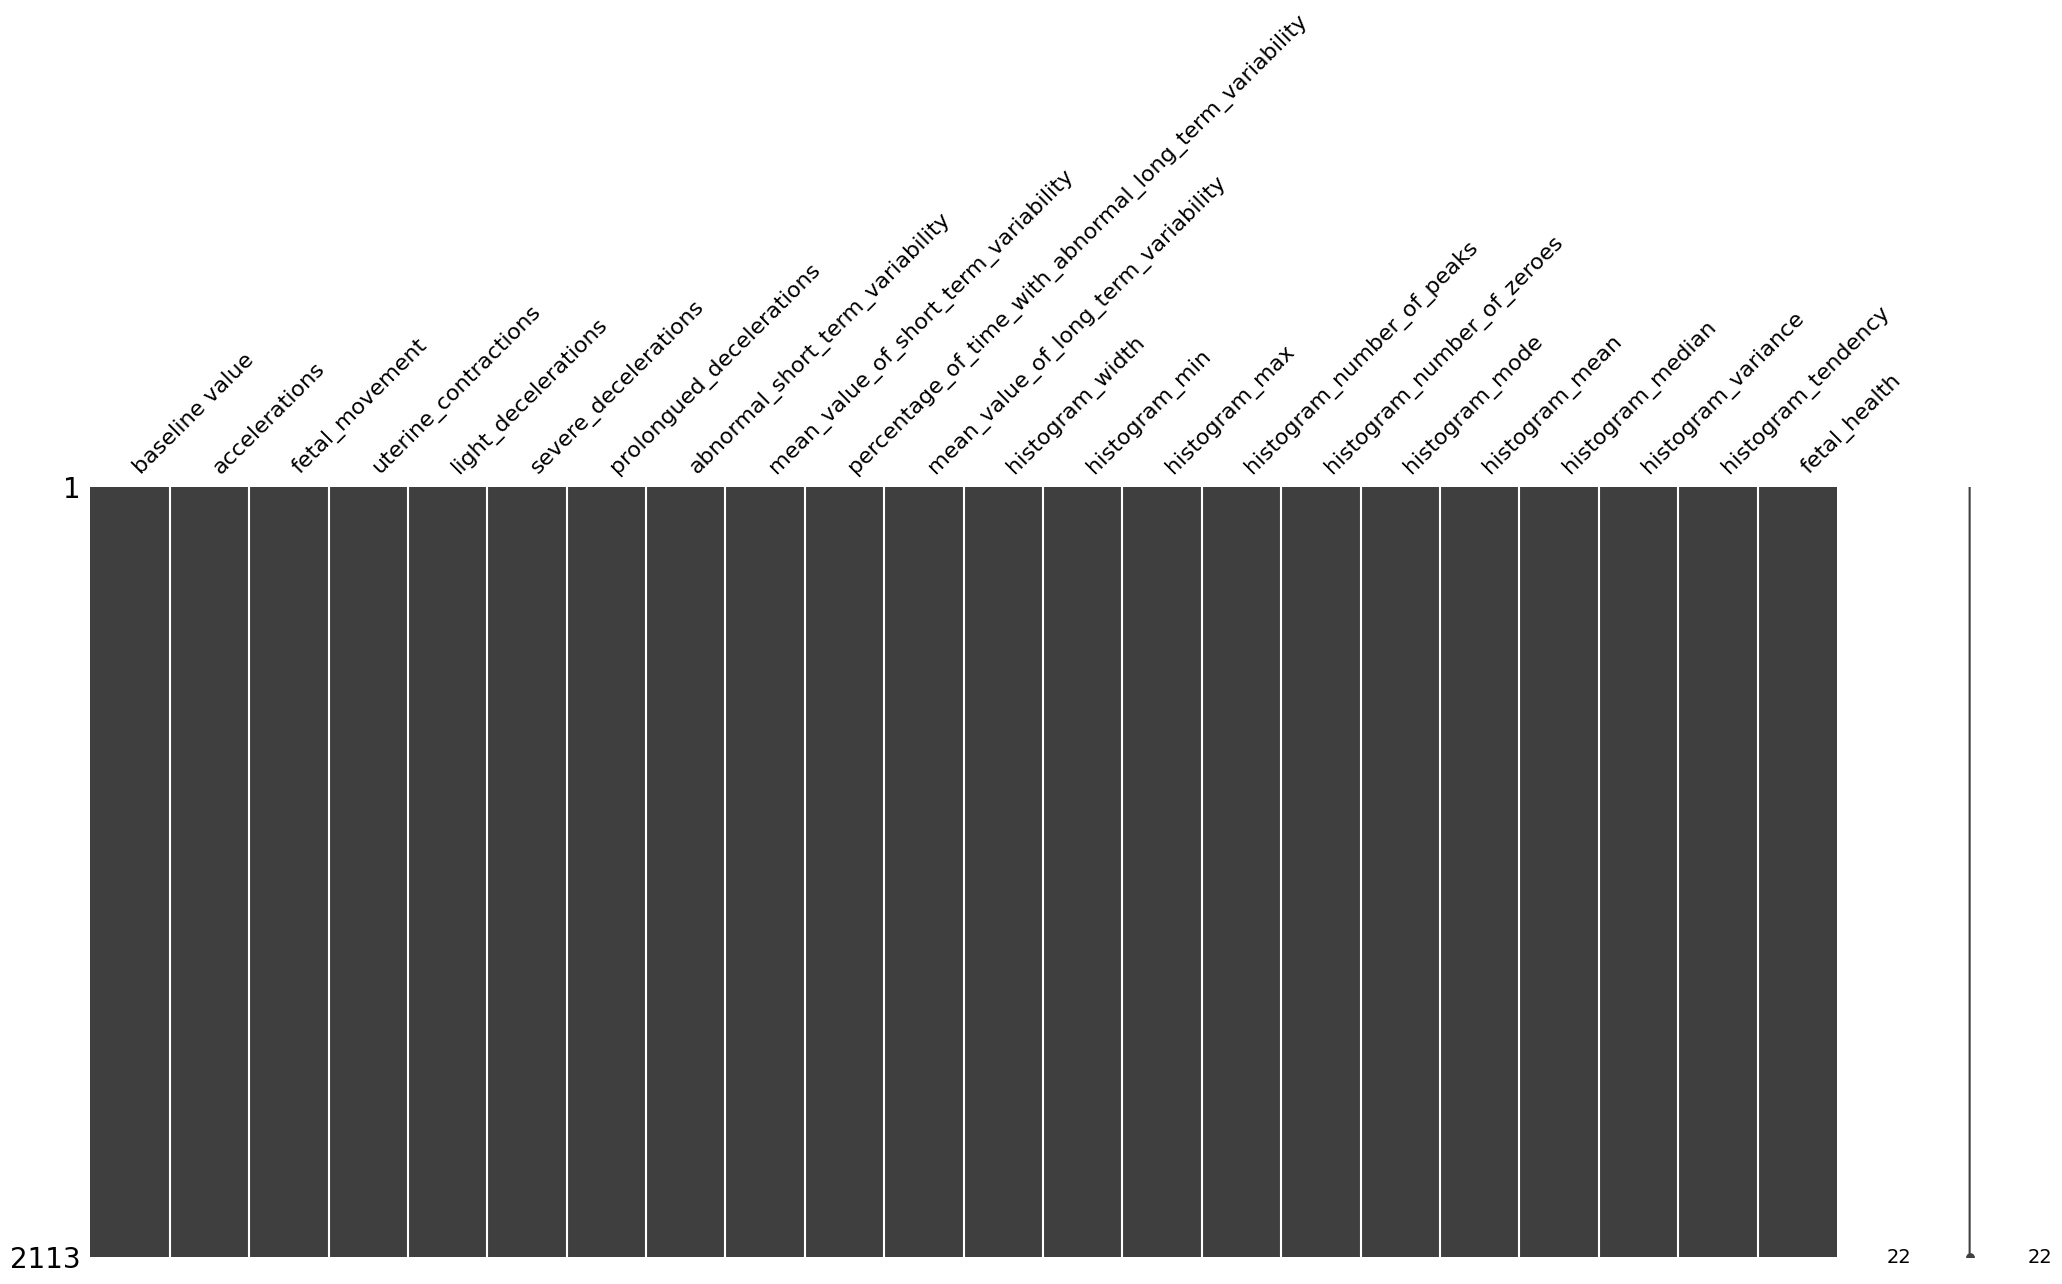

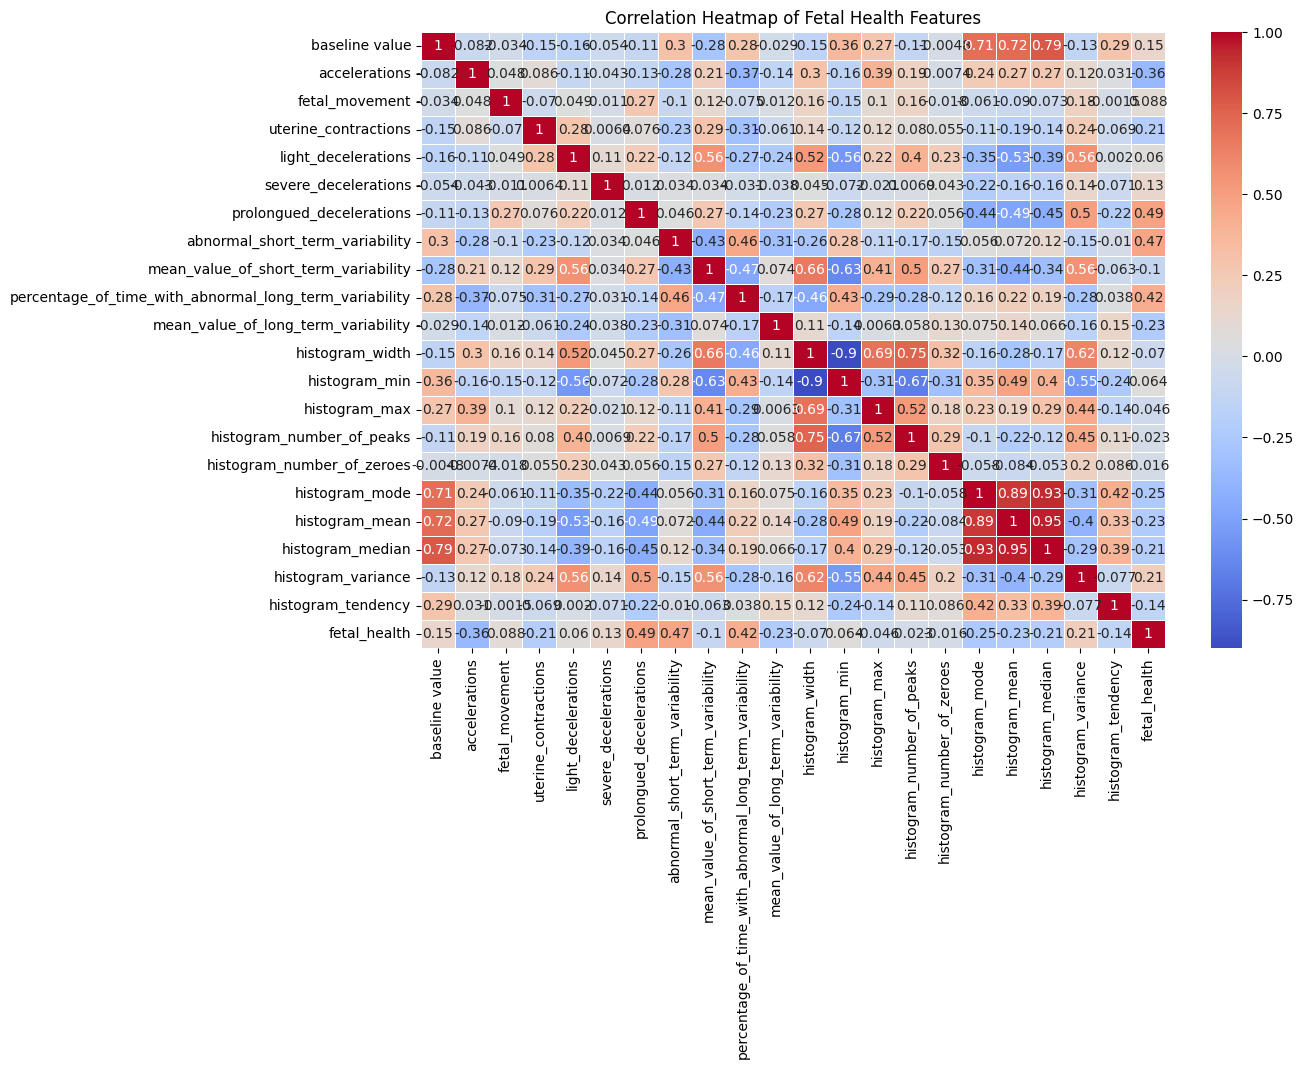

<ipython-input-2-8174eb148a38>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fetal_health', data=fetal_data, palette='viridis')


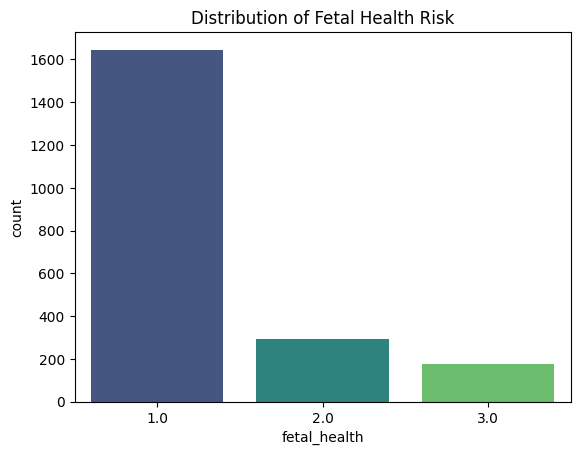

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import missingno as msno

# Step 1: Load the Dataset
file_path = 'fetal_health.csv'
fetal_data = pd.read_csv(file_path)

# Step 2: Inspect the Dataset
# View the first few rows
print(fetal_data.head())

# Check for missing values
print(fetal_data.isnull().sum())

# Check basic statistics
print(fetal_data.describe())

# Step 3: Data Cleaning
# Handling missing values (if any)
# If there are missing values, you can impute or drop them.
# In this case, assume no missing values. Otherwise, uncomment the following:
# fetal_data.fillna(fetal_data.mean(), inplace=True)

# Check for duplicates and remove them
fetal_data = fetal_data.drop_duplicates()

# Step 4: Exploratory Data Analysis (EDA)
# Visualize missing data (if present)
msno.matrix(fetal_data)

# Check the correlation matrix
correlation_matrix = fetal_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Fetal Health Features")
plt.show()

# Visualizing distribution of fetal health
sns.countplot(x='fetal_health', data=fetal_data, palette='viridis')
plt.title("Distribution of Fetal Health Risk")
plt.show()

# Step 5: Data Preprocessing
# Define features (X) and target (y)
X = fetal_data.drop(columns=['fetal_health'])
y = fetal_data['fetal_health']



In [ ]:
# Standardize the features (important for models like SVM, k-NN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

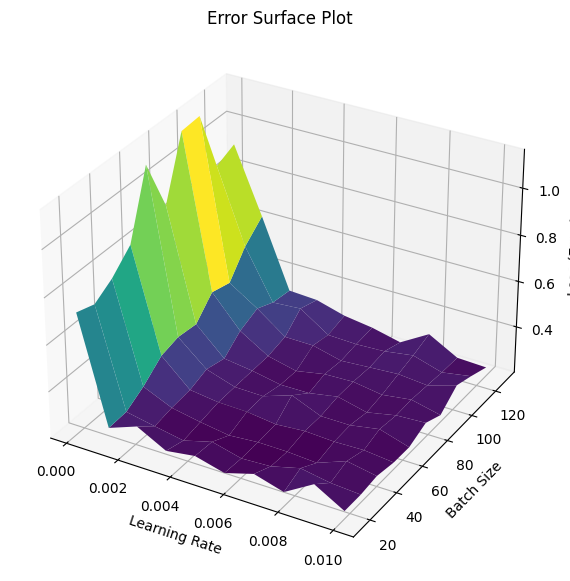

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from mpl_toolkits.mplot3d import Axes3D

# Function to create and compile the model
def create_model(learning_rate):
    model = Sequential()

    # Use Input() layer to define input shape
    model.add(Input(shape=(X_train.shape[1],)))

    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # Assuming 3 output classes

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Set learning rates and batch sizes to evaluate
learning_rates = np.linspace(0.0001, 0.01, 10)  # Vary learning rates from 0.0001 to 0.01
batch_sizes = np.linspace(16, 128, 10, dtype=int)  # Vary batch sizes from 16 to 128

# Initialize a matrix to store the loss values for each combination of learning rate and batch size
loss_values = np.zeros((len(learning_rates), len(batch_sizes)))

# Adjust the labels (assuming labels are 1-based, adjust to 0-based indexing)
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# One-hot encode the labels (assuming labels are adjusted to start from 0)
y_train_onehot = to_categorical(y_train_adjusted, num_classes=3)
y_test_onehot = to_categorical(y_test_adjusted, num_classes=3)

# Loop through all combinations of learning rate and batch size
for i, lr in enumerate(learning_rates):
    for j, bs in enumerate(batch_sizes):
        # Create and compile the model
        model = create_model(learning_rate=lr)

        # Train the model (for simplicity, only 1 epoch to speed up this example)
        model.fit(X_train, y_train_onehot, epochs=1, batch_size=bs, verbose=0)

        # Evaluate the model on the test set and record the loss
        loss, accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)
        loss_values[i, j] = loss

# Create a 3D plot of the error surface
X, Y = np.meshgrid(learning_rates, batch_sizes)  # Create meshgrid for 3D plot

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, loss_values.T, cmap='viridis')

# Set plot labels and title
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Batch Size')
ax.set_zlabel('Loss (Error)')
ax.set_title('Error Surface Plot')

plt.show()


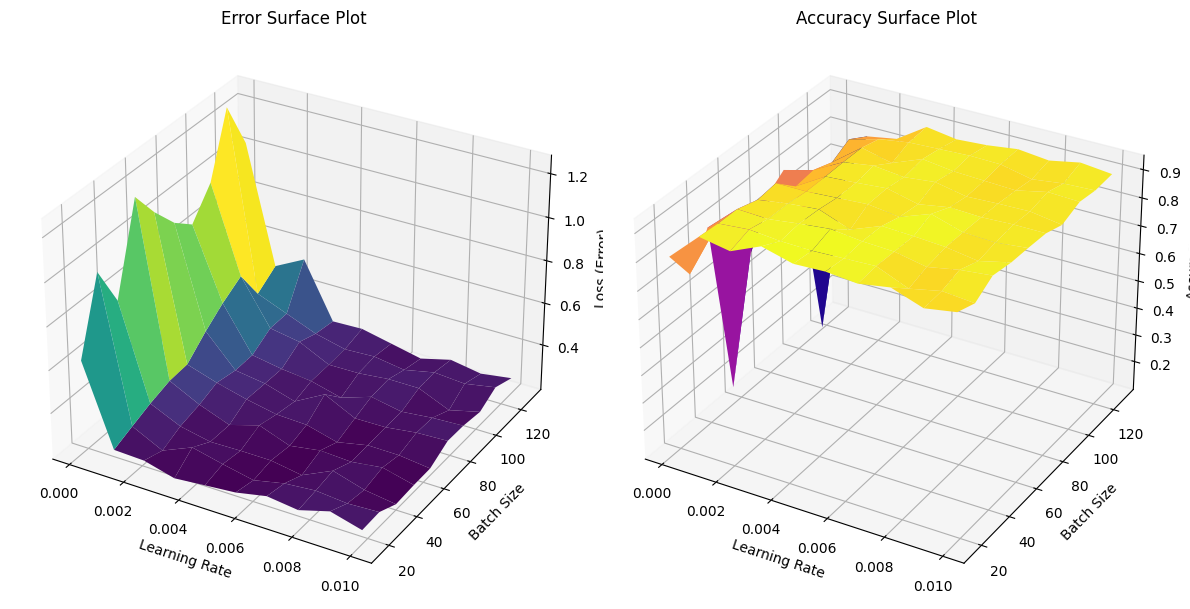

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from mpl_toolkits.mplot3d import Axes3D

# Function to create and compile the model
def create_model(learning_rate):
    model = Sequential()

    # Use Input() layer to define input shape
    model.add(Input(shape=(X_train.shape[1],)))

    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(3, activation='softmax'))  # Assuming 3 output classes

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Set learning rates and batch sizes to evaluate
learning_rates = np.linspace(0.001, 0.5, 10)  # Vary learning rates from 0.0001 to 0.01
batch_sizes = np.linspace(16, 128, 10, dtype=int)  # Vary batch sizes from 16 to 128

# Initialize matrices to store the loss and accuracy values for each combination of learning rate and batch size
loss_values = np.zeros((len(learning_rates), len(batch_sizes)))
accuracy_values = np.zeros((len(learning_rates), len(batch_sizes)))

# Adjust the labels (assuming labels are 1-based, adjust to 0-based indexing)
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# One-hot encode the labels (assuming labels are adjusted to start from 0)
y_train_onehot = to_categorical(y_train_adjusted, num_classes=3)
y_test_onehot = to_categorical(y_test_adjusted, num_classes=3)

# Loop through all combinations of learning rate and batch size
for i, lr in enumerate(learning_rates):
    for j, bs in enumerate(batch_sizes):
        # Create and compile the model
        model = create_model(learning_rate=lr)

        # Train the model (for simplicity, only 1 epoch to speed up this example)
        model.fit(X_train, y_train_onehot, epochs=1, batch_size=bs, verbose=0)

        # Evaluate the model on the test set and record the loss and accuracy
        loss, accuracy = model.evaluate(X_test, y_test_onehot, verbose=0)
        loss_values[i, j] = loss
        accuracy_values[i, j] = accuracy

# Create a 3D plot of the error (loss) surface
X, Y = np.meshgrid(learning_rates, batch_sizes)  # Create meshgrid for 3D plot

fig = plt.figure(figsize=(12, 6))

# Loss Surface Plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, loss_values.T, cmap='viridis')
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Batch Size')
ax1.set_zlabel('Loss (Error)')
ax1.set_title('Error Surface Plot')

# Accuracy Surface Plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, accuracy_values.T, cmap='plasma')
ax2.set_xlabel('Learning Rate')
ax2.set_ylabel('Batch Size')
ax2.set_zlabel('Accuracy')
ax2.set_title('Accuracy Surface Plot')

plt.tight_layout()


plt.show()


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.6473 - loss: 1.1669 - val_accuracy: 0.8376 - val_loss: 0.6904
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8362 - loss: 0.5716 - val_accuracy: 0.8965 - val_loss: 0.4563
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8776 - loss: 0.5023 - val_accuracy: 0.8659 - val_loss: 0.4900
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8509 - loss: 0.5210 - val_accuracy: 0.8871 - val_loss: 0.4525
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8701 - loss: 0.4930 - val_accuracy: 0.8988 - val_loss: 0.3993
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8662 - loss: 0.4540 - val_accuracy: 0.9082 - val_loss: 0.3834
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8944 - loss: 0.4165 - val_accuracy: 0.8988 - val_loss: 0.3768
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8683 - loss: 0.4403 - val_accuracy: 0.8988 - val_loss

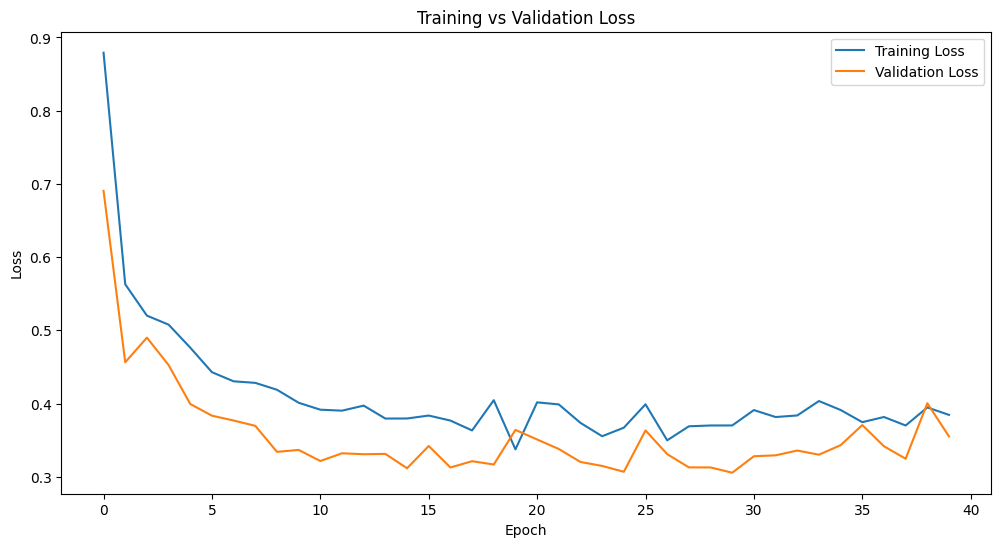

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

# Load and prepare the dataset
file_path = 'fetal_health.csv'  # Update this path accordingly
data = pd.read_csv(file_path)
X = data.drop(columns=['fetal_health'])  # Assuming 'fetal_health' is the target column
y = data['fetal_health']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test-Cross Validation Split
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# One-hot encode the labels
y_train_onehot = to_categorical(y_train - 1, num_classes=len(set(y_train)))
y_val_onehot = to_categorical(y_val - 1, num_classes=len(set(y_val)))
y_test_onehot = to_categorical(y_test - 1, num_classes=len(set(y_test)))

# Function to create and compile the model with improvements
def create_improved_model(learning_rate=0.01):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(len(np.unique(y_train)), activation='softmax')  # Set the output layer to match the number of classes
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Initialize the model with the improved architecture
model_improved = create_improved_model()

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the improved model
history_improved = model_improved.fit(X_train, y_train_onehot, epochs=50, batch_size=32,
                                      validation_data=(X_val, y_val_onehot), verbose=1,
                                      callbacks=[early_stopping])

# Evaluate the improved model on the test set
test_loss_improved, test_accuracy_improved = model_improved.evaluate(X_test, y_test_onehot)

# Plot training & validation loss values to check for overfitting
plt.figure(figsize=(12, 6))
plt.plot(history_improved.history['loss'], label='Training Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


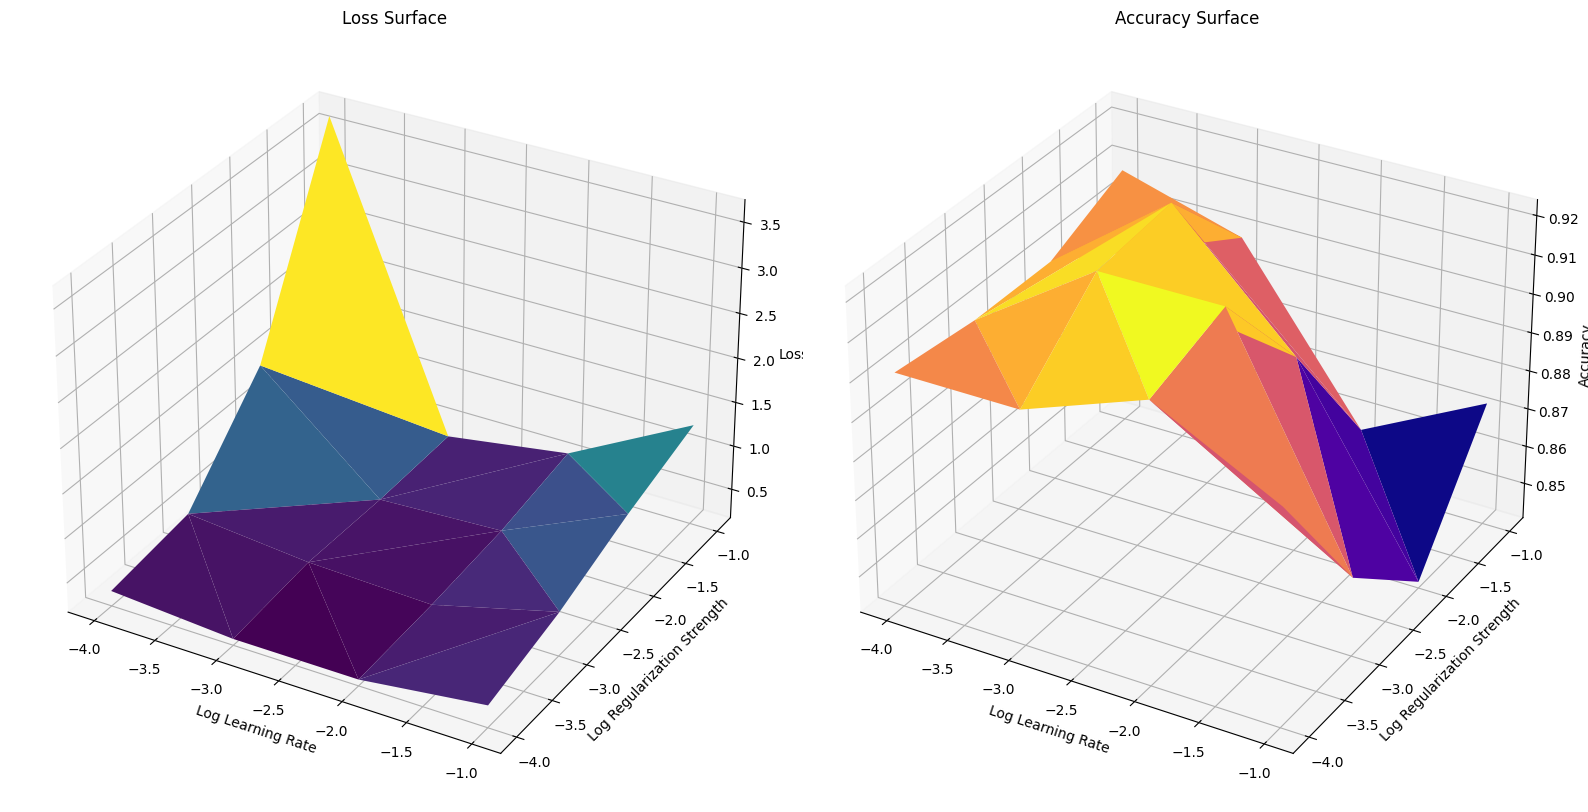

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Define ranges for learning rate and regularization strength
learning_rates = np.logspace(-4, -1, 4)  # 0.0001 to 0.1
regularization_strengths = np.logspace(-4, -1, 4)  # 0.0001 to 0.1

# Lists to store the results
loss_surface = []
accuracy_surface = []

# Perform grid search over the hyperparameters
for lr in learning_rates:
    for reg in regularization_strengths:
        # Create a new model for each combination
        model = Sequential([
            Input(shape=(X_train.shape[1],)),
            Dense(128, activation='relu', kernel_regularizer=l2(reg)),
            BatchNormalization(),
            Dropout(0.3),
            Dense(64, activation='relu', kernel_regularizer=l2(reg)),
            BatchNormalization(),
            Dropout(0.3),
            Dense(32, activation='relu', kernel_regularizer=l2(reg)),
            BatchNormalization(),
            Dropout(0.3),
            Dense(len(np.unique(y_train)), activation='softmax')
        ])
        optimizer = Adam(learning_rate=lr)
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        # Train the model (with early stopping to save time)
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        history = model.fit(X_train, y_train_onehot, epochs=50, batch_size=32,
                            validation_data=(X_val, y_val_onehot), verbose=0,
                            callbacks=[early_stopping])

        # Evaluate on the validation set
        val_loss, val_accuracy = model.evaluate(X_val, y_val_onehot, verbose=0)

        # Store the results
        loss_surface.append((lr, reg, val_loss))
        accuracy_surface.append((lr, reg, val_accuracy))

# Convert to numpy arrays for easy plotting
loss_surface = np.array(loss_surface)
accuracy_surface = np.array(accuracy_surface)

# Create 3D plots for the loss surface and accuracy surface
fig = plt.figure(figsize=(16, 8))

# 3D plot for the loss surface
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_trisurf(np.log10(loss_surface[:, 0]), np.log10(loss_surface[:, 1]), loss_surface[:, 2], cmap='viridis')
ax1.set_title('Loss Surface')
ax1.set_xlabel('Log Learning Rate')
ax1.set_ylabel('Log Regularization Strength')
ax1.set_zlabel('Loss')

# 3D plot for the accuracy surface
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_trisurf(np.log10(accuracy_surface[:, 0]), np.log10(accuracy_surface[:, 1]), accuracy_surface[:, 2], cmap='plasma')
ax2.set_title('Accuracy Surface')
ax2.set_xlabel('Log Learning Rate')
ax2.set_ylabel('Log Regularization Strength')
ax2.set_zlabel('Accuracy')

plt.tight_layout()
plt.show()


Fold Test Accuracy: 0.8568
Fold Test Accuracy: 0.9129
Fold Test Accuracy: 0.8494
Fold Test Accuracy: 0.8824
Fold Test Accuracy: 0.8941

Nested Cross-Validation Accuracy: 0.8791 ± 0.0235


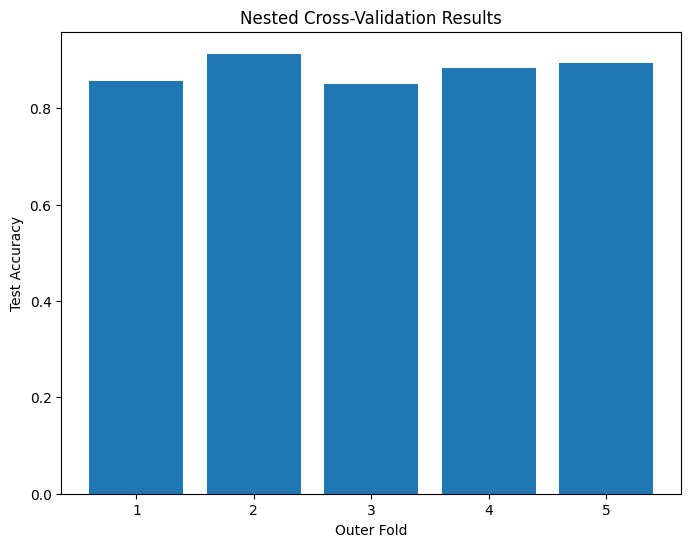

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

# Load and prepare the dataset
file_path = 'fetal_health.csv'  # Update this path accordingly
data = pd.read_csv(file_path)
X = data.drop(columns=['fetal_health'])  # Assuming 'fetal_health' is the target column
y = data['fetal_health']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the labels
y_onehot = to_categorical(y - 1, num_classes=len(set(y)))

# Function to create and compile the model with improvements
def create_improved_model(learning_rate=0.01):
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(len(np.unique(y)), activation='softmax')  # Set the output layer to match the number of classes
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Outer cross-validation loop
outer_kf = KFold(n_splits=5, shuffle=True, random_state=42)
outer_fold_results = []

for train_idx, test_idx in outer_kf.split(X_scaled):
    X_train_outer, X_test_outer = X_scaled[train_idx], X_scaled[test_idx]
    y_train_outer, y_test_outer = y_onehot[train_idx], y_onehot[test_idx]

    # Inner cross-validation for hyperparameter tuning
    inner_kf = KFold(n_splits=3, shuffle=True, random_state=42)
    best_val_accuracy = 0
    best_learning_rate = 0.001

    for learning_rate in [0.001, 0.01, 0.05]:  # Testing different learning rates
        inner_fold_accuracies = []

        for inner_train_idx, inner_val_idx in inner_kf.split(X_train_outer):
            X_train_inner, X_val_inner = X_train_outer[inner_train_idx], X_train_outer[inner_val_idx]
            y_train_inner, y_val_inner = y_train_outer[inner_train_idx], y_train_outer[inner_val_idx]

            # Create model
            model_inner = create_improved_model(learning_rate=learning_rate)

            # Train the model
            history_inner = model_inner.fit(X_train_inner, y_train_inner, epochs=50, batch_size=32,
                                            validation_data=(X_val_inner, y_val_inner), verbose=0,
                                            callbacks=[early_stopping])

            # Evaluate on validation set
            val_loss, val_accuracy = model_inner.evaluate(X_val_inner, y_val_inner, verbose=0)
            inner_fold_accuracies.append(val_accuracy)

        # Average validation accuracy for the current learning rate
        avg_val_accuracy = np.mean(inner_fold_accuracies)

        # Update best learning rate if the current one performs better
        if avg_val_accuracy > best_val_accuracy:
            best_val_accuracy = avg_val_accuracy
            best_learning_rate = learning_rate

    # Train final model on outer training set using the best hyperparameters
    final_model = create_improved_model(learning_rate=best_learning_rate)
    final_model.fit(X_train_outer, y_train_outer, epochs=50, batch_size=32,
                    validation_data=(X_test_outer, y_test_outer), verbose=0,
                    callbacks=[early_stopping])

    # Evaluate the final model on the outer test set
    test_loss, test_accuracy = final_model.evaluate(X_test_outer, y_test_outer, verbose=0)
    outer_fold_results.append(test_accuracy)
    print(f'Fold Test Accuracy: {test_accuracy:.4f}')

# Calculate and print overall cross-validation accuracy
mean_accuracy = np.mean(outer_fold_results)
std_accuracy = np.std(outer_fold_results)
print(f'\nNested Cross-Validation Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}')

# Plot results of outer cross-validation
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(outer_fold_results) + 1), outer_fold_results)
plt.xlabel('Outer Fold')
plt.ylabel('Test Accuracy')
plt.title('Nested Cross-Validation Results')
plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
11/11 ━━━

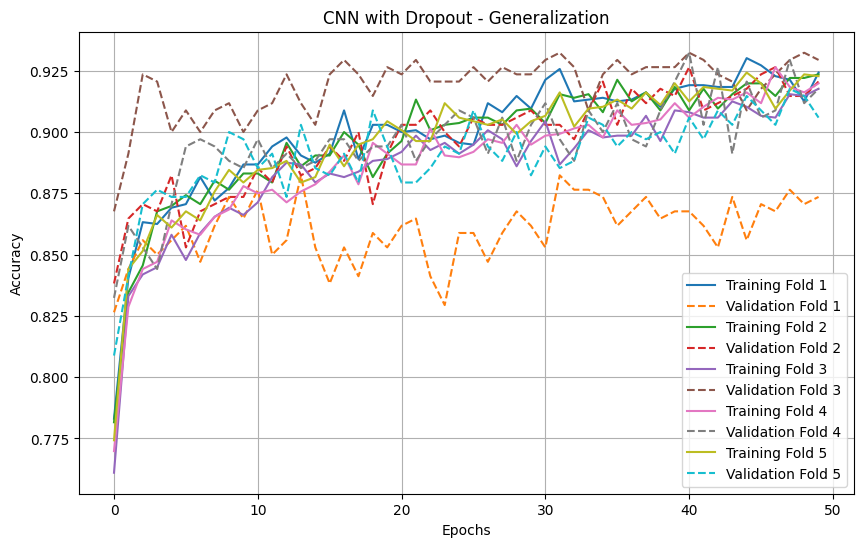

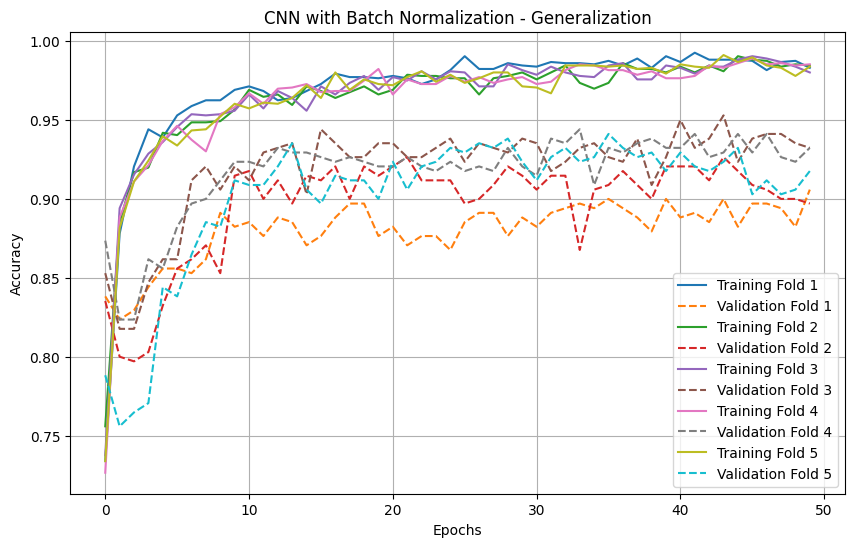

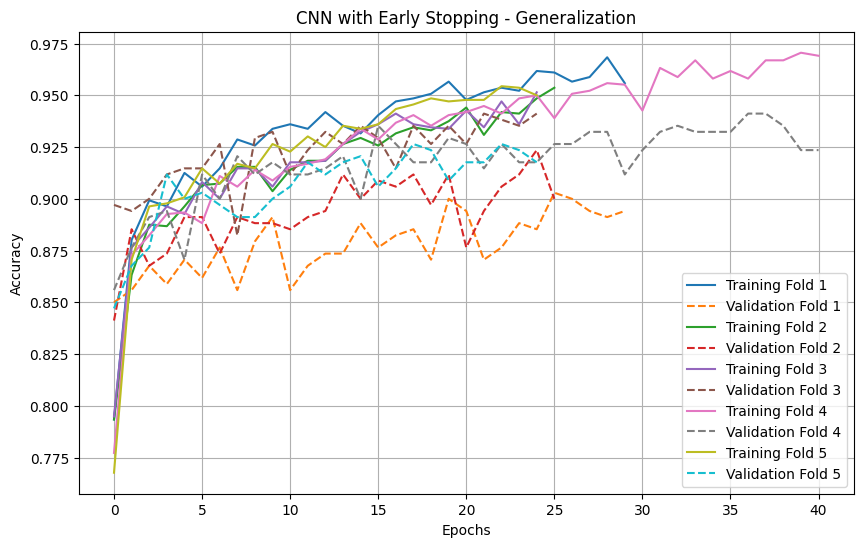

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load and prepare the dataset (1D data)
file_path = 'fetal_health.csv'  # Update this path accordingly
data = pd.read_csv(file_path)
X = data.drop(columns=['fetal_health'])  # Assuming 'fetal_health' is the target column
y = data['fetal_health']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape features for CNN input (1D data, so we add a single channel)
X_scaled = np.expand_dims(X_scaled, axis=-1)

# One-hot encode the labels
y_onehot = to_categorical(y - 1, num_classes=len(set(y)))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

# Define CNN models for 1D data
def create_cnn_dropout(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.5),  # Dropout layer added
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(len(np.unique(y)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_cnn_batch_norm(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(32, kernel_size=3, activation='relu'),
        BatchNormalization(),  # Batch normalization layer added
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu'),
        BatchNormalization(),  # Batch normalization layer added
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),  # Batch normalization in fully connected layers
        Dense(len(np.unique(y)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_cnn_early_stopping(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(len(np.unique(y)), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train each CNN model and return history
def train_model(model_func, X_train, y_train, X_val, y_val, early_stop=False):
    model = model_func(input_shape=(X_train.shape[1], X_train.shape[2]))

    # Early stopping for model 3
    callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)] if early_stop else []

    history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_data=(X_val, y_val), verbose=0,
                        callbacks=callbacks)

    return model, history

# Perform 5-fold cross-validation and stack models
kf = KFold(n_splits=5, shuffle=True, random_state=42)
stacking_train_predictions = []
stacking_test_predictions = []

# Arrays to store history for plotting
train_accuracies_dropout = []
val_accuracies_dropout = []
train_accuracies_batch_norm = []
val_accuracies_batch_norm = []
train_accuracies_early_stopping = []
val_accuracies_early_stopping = []

for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Train CNN with dropout
    cnn_dropout, history_dropout = train_model(create_cnn_dropout, X_train_fold, y_train_fold, X_val_fold, y_val_fold)

    # Train CNN with batch normalization
    cnn_batch_norm, history_batch_norm = train_model(create_cnn_batch_norm, X_train_fold, y_train_fold, X_val_fold, y_val_fold)

    # Train CNN with early stopping
    cnn_early_stopping, history_early_stopping = train_model(create_cnn_early_stopping, X_train_fold, y_train_fold, X_val_fold, y_val_fold, early_stop=True)

    # Append accuracies to lists for plotting later
    train_accuracies_dropout.append(history_dropout.history['accuracy'])
    val_accuracies_dropout.append(history_dropout.history['val_accuracy'])
    train_accuracies_batch_norm.append(history_batch_norm.history['accuracy'])
    val_accuracies_batch_norm.append(history_batch_norm.history['val_accuracy'])
    train_accuracies_early_stopping.append(history_early_stopping.history['accuracy'])
    val_accuracies_early_stopping.append(history_early_stopping.history['val_accuracy'])

    # Predict on validation fold
    val_preds_dropout = cnn_dropout.predict(X_val_fold)
    val_preds_batch_norm = cnn_batch_norm.predict(X_val_fold)
    val_preds_early_stopping = cnn_early_stopping.predict(X_val_fold)

    # Concatenate predictions to create meta-features for stacking
    val_preds_stacked = np.concatenate([val_preds_dropout, val_preds_batch_norm, val_preds_early_stopping], axis=1)
    stacking_train_predictions.append(val_preds_stacked)

    # Predict on test set for this fold
    test_preds_dropout = cnn_dropout.predict(X_test)
    test_preds_batch_norm = cnn_batch_norm.predict(X_test)
    test_preds_early_stopping = cnn_early_stopping.predict(X_test)

    test_preds_stacked = np.concatenate([test_preds_dropout, test_preds_batch_norm, test_preds_early_stopping], axis=1)
    stacking_test_predictions.append(test_preds_stacked)

# Convert predictions to NumPy arrays
stacking_train_predictions = np.vstack(stacking_train_predictions)
stacking_test_predictions = np.mean(stacking_test_predictions, axis=0)

# Convert one-hot encoded labels to class indices for meta-learner
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Meta-learner: Logistic Regression
meta_learner = LogisticRegression()
meta_learner.fit(stacking_train_predictions, y_train_labels)

# Make predictions with the meta-learner
final_preds = meta_learner.predict(stacking_test_predictions)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test_labels, final_preds)
print(f'Ensemble Model Accuracy: {accuracy:.4f}')

# Plot generalization (train vs validation accuracy) for each model

# Function to plot generalization curve
def plot_generalization_curve(train_accuracies, val_accuracies, title):
    plt.figure(figsize=(10, 6))
    for i in range(len(train_accuracies)):
        plt.plot(train_accuracies[i], label=f'Training Fold {i+1}')
        plt.plot(val_accuracies[i], '--', label=f'Validation Fold {i+1}')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Plot generalization curves for the three models
plot_generalization_curve(train_accuracies_dropout, val_accuracies_dropout, 'CNN with Dropout - Generalization')
plot_generalization_curve(train_accuracies_batch_norm, val_accuracies_batch_norm, 'CNN with Batch Normalization - Generalization')
plot_generalization_curve(train_accuracies_early_stopping, val_accuracies_early_stopping, 'CNN with Early Stopping - Generalization')


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
11/11 ━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


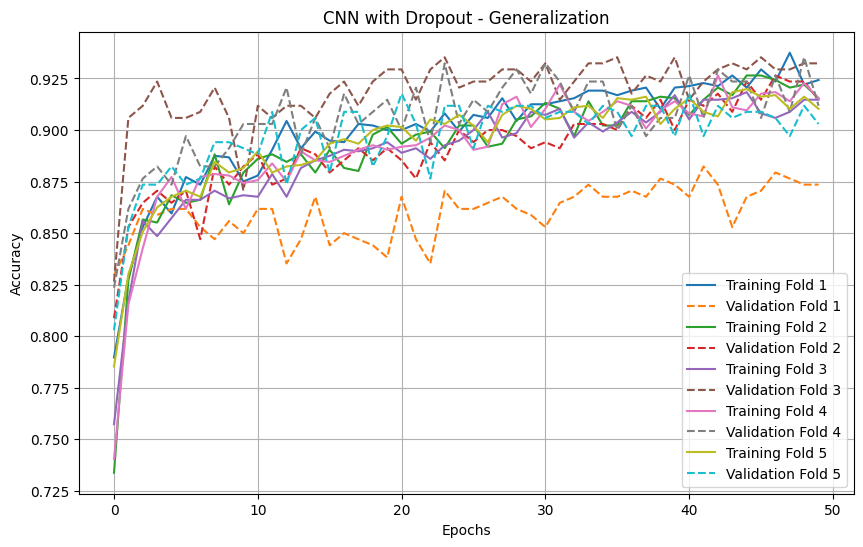

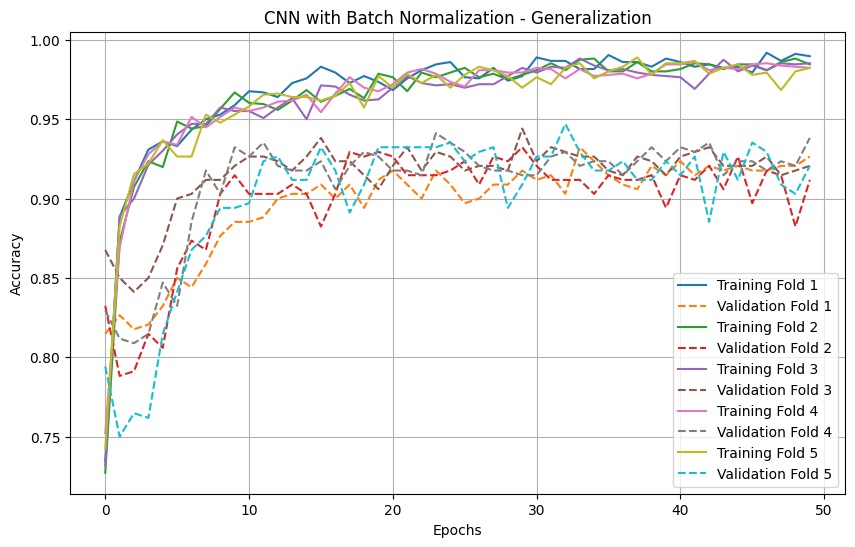

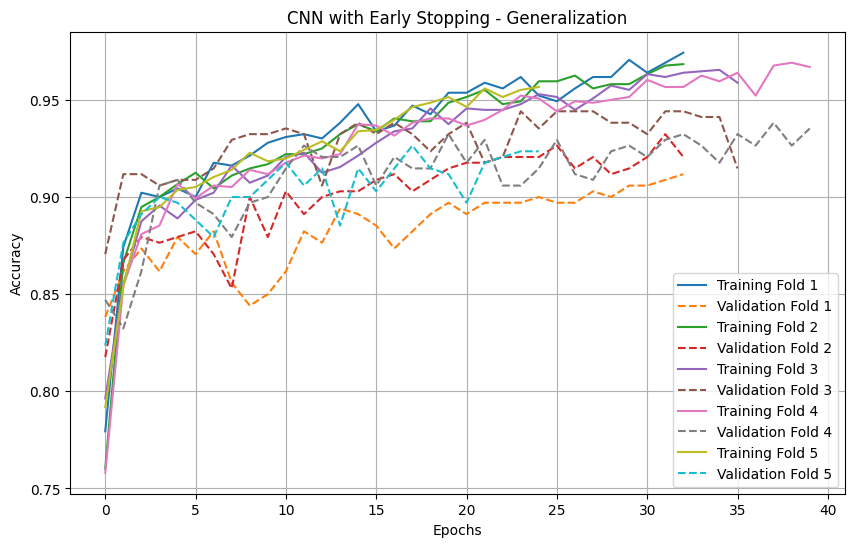

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load and prepare the dataset (1D data)
file_path = 'fetal_health.csv'  # Update this path accordingly
data = pd.read_csv(file_path)

# Assuming the target column 'fetal_health' contains 3 categories: 1 (Normal), 2 (Moderate), 3 (Pathological)
# Map the categories to 0, 1, 2
data['fetal_health'] = data['fetal_health'] - 1

X = data.drop(columns=['fetal_health'])  # Features
y = data['fetal_health']  # Target: Normal, Moderate, Pathological

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape features for CNN input (1D data, so we add a single channel)
X_scaled = np.expand_dims(X_scaled, axis=-1)

# One-hot encode the labels (Normal=0, Moderate=1, Pathological=2)
y_onehot = to_categorical(y, num_classes=3)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

# Define CNN models for 1D data
def create_cnn_dropout(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.5),  # Dropout layer added
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(3, activation='softmax')  # 3 categories (Normal, Moderate, Pathological)
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_cnn_batch_norm(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(32, kernel_size=3, activation='relu'),
        BatchNormalization(),  # Batch normalization layer added
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu'),
        BatchNormalization(),  # Batch normalization layer added
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),  # Batch normalization in fully connected layers
        Dense(3, activation='softmax')  # 3 categories
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_cnn_early_stopping(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(3, activation='softmax')  # 3 categories
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train each CNN model and return history
def train_model(model_func, X_train, y_train, X_val, y_val, early_stop=False):
    model = model_func(input_shape=(X_train.shape[1], X_train.shape[2]))

    # Early stopping for model 3
    callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)] if early_stop else []

    history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_data=(X_val, y_val), verbose=0,
                        callbacks=callbacks)

    return model, history

# Perform 5-fold cross-validation and stack models
kf = KFold(n_splits=5, shuffle=True, random_state=42)
stacking_train_predictions = []
stacking_test_predictions = []

# Arrays to store history for plotting
train_accuracies_dropout = []
val_accuracies_dropout = []
train_accuracies_batch_norm = []
val_accuracies_batch_norm = []
train_accuracies_early_stopping = []
val_accuracies_early_stopping = []

for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Train CNN with dropout
    cnn_dropout, history_dropout = train_model(create_cnn_dropout, X_train_fold, y_train_fold, X_val_fold, y_val_fold)

    # Train CNN with batch normalization
    cnn_batch_norm, history_batch_norm = train_model(create_cnn_batch_norm, X_train_fold, y_train_fold, X_val_fold, y_val_fold)

    # Train CNN with early stopping
    cnn_early_stopping, history_early_stopping = train_model(create_cnn_early_stopping, X_train_fold, y_train_fold, X_val_fold, y_val_fold, early_stop=True)

    # Append accuracies to lists for plotting later
    train_accuracies_dropout.append(history_dropout.history['accuracy'])
    val_accuracies_dropout.append(history_dropout.history['val_accuracy'])
    train_accuracies_batch_norm.append(history_batch_norm.history['accuracy'])
    val_accuracies_batch_norm.append(history_batch_norm.history['val_accuracy'])
    train_accuracies_early_stopping.append(history_early_stopping.history['accuracy'])
    val_accuracies_early_stopping.append(history_early_stopping.history['val_accuracy'])

    # Predict on validation fold
    val_preds_dropout = cnn_dropout.predict(X_val_fold)
    val_preds_batch_norm = cnn_batch_norm.predict(X_val_fold)
    val_preds_early_stopping = cnn_early_stopping.predict(X_val_fold)

    # Concatenate predictions to create meta-features for stacking
    val_preds_stacked = np.concatenate([val_preds_dropout, val_preds_batch_norm, val_preds_early_stopping], axis=1)
    stacking_train_predictions.append(val_preds_stacked)

    # Predict on test set for this fold
    test_preds_dropout = cnn_dropout.predict(X_test)
    test_preds_batch_norm = cnn_batch_norm.predict(X_test)
    test_preds_early_stopping = cnn_early_stopping.predict(X_test)

    test_preds_stacked = np.concatenate([test_preds_dropout, test_preds_batch_norm, test_preds_early_stopping], axis=1)
    stacking_test_predictions.append(test_preds_stacked)

# Convert predictions to NumPy arrays
stacking_train_predictions = np.vstack(stacking_train_predictions)
stacking_test_predictions = np.mean(stacking_test_predictions, axis=0)

# Convert one-hot encoded labels to class indices for meta-learner
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Meta-learner: Logistic Regression
meta_learner = LogisticRegression()
meta_learner.fit(stacking_train_predictions, y_train_labels)

# Make predictions with the meta-learner
final_preds = meta_learner.predict(stacking_test_predictions)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test_labels, final_preds)
print(f'Ensemble Model Accuracy: {accuracy:.4f}')

# Classification report to show prediction categories
report = classification_report(y_test_labels, final_preds, target_names=['Normal', 'Moderate', 'Pathological'])
print(report)

# Plot generalization (train vs validation accuracy) for each model

# Function to plot generalization curve
def plot_generalization_curve(train_accuracies, val_accuracies, title):
    plt.figure(figsize=(10, 6))
    for i in range(len(train_accuracies)):
        plt.plot(train_accuracies[i], label=f'Training Fold {i+1}')
        plt.plot(val_accuracies[i], '--', label=f'Validation Fold {i+1}')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Plot generalization curves for the three models
plot_generalization_curve(train_accuracies_dropout, val_accuracies_dropout, 'CNN with Dropout - Generalization')
plot_generalization_curve(train_accuracies_batch_norm, val_accuracies_batch_norm, 'CNN with Batch Normalization - Generalization')
plot_generalization_curve(train_accuracies_early_stopping, val_accuracies_early_stopping, 'CNN with Early Stopping - Generalization')


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Ensemble Model Accuracy: 0.7924


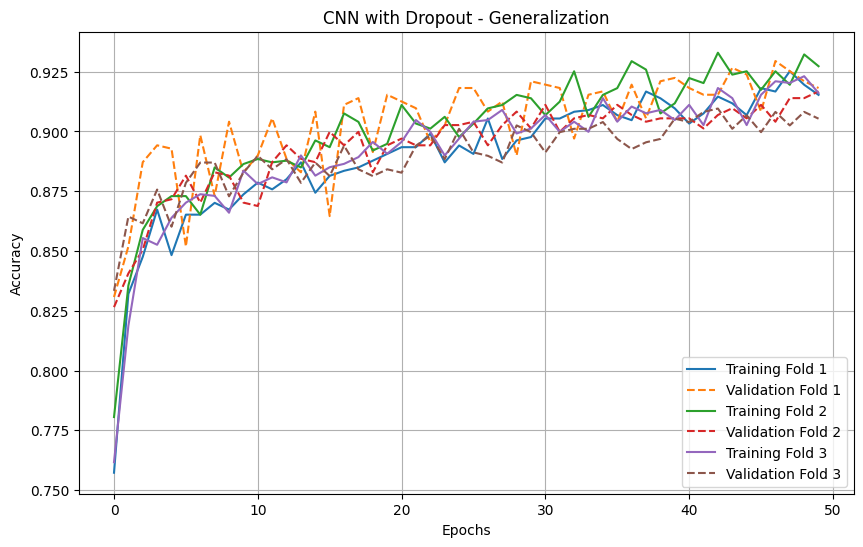

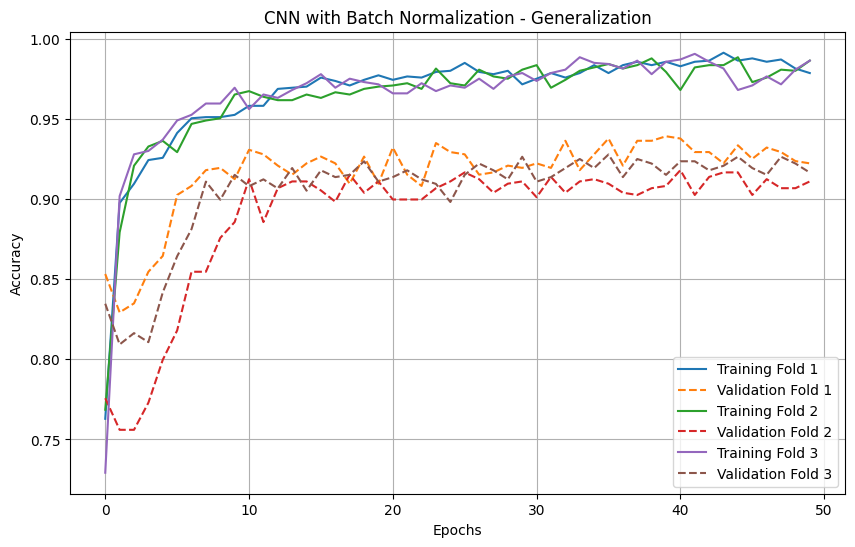

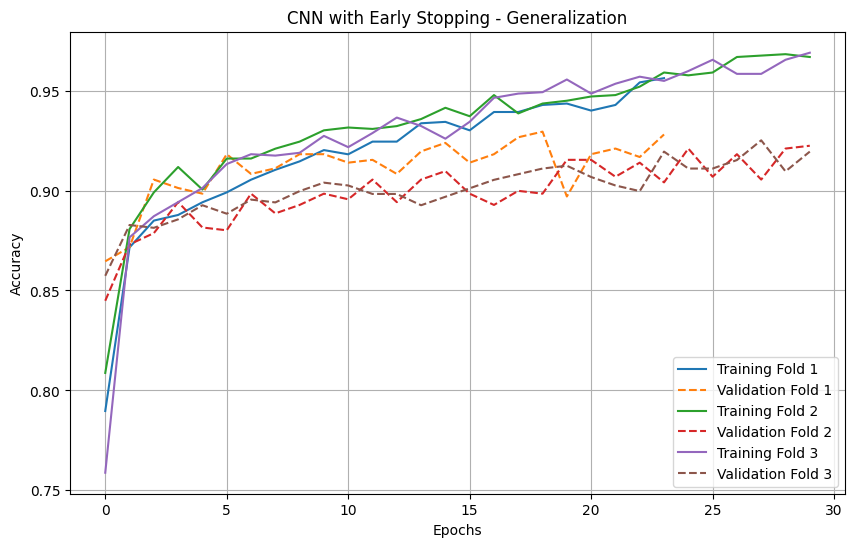

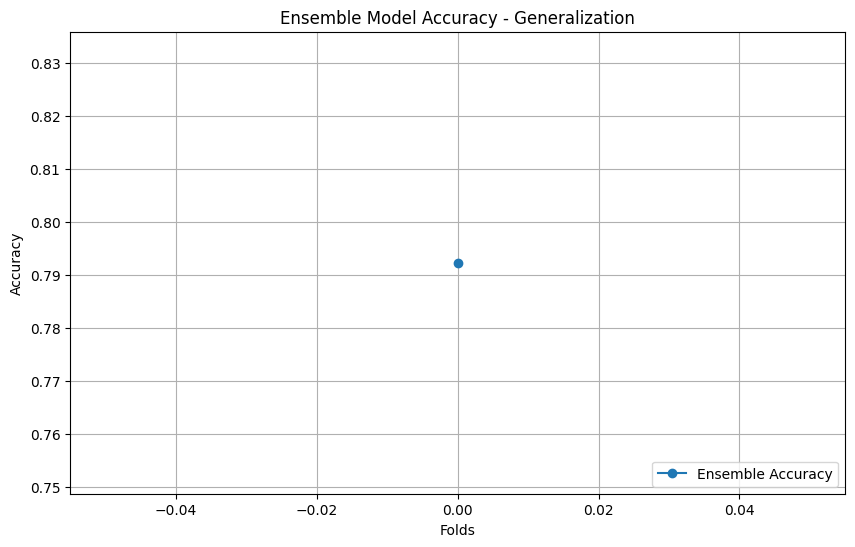

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load and prepare the dataset (1D data)
file_path = 'fetal_health.csv'  # Update this path accordingly
data = pd.read_csv(file_path)

# Assuming the target column 'fetal_health' contains 3 categories: 1 (Normal), 2 (Moderate), 3 (Pathological)
# Map the categories to 0, 1, 2
data['fetal_health'] = data['fetal_health'] - 1

X = data.drop(columns=['fetal_health'])  # Features
y = data['fetal_health']  # Target: Normal, Moderate, Pathological

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape features for CNN input (1D data, so we add a single channel)
X_scaled = np.expand_dims(X_scaled, axis=-1)

# One-hot encode the labels (Normal=0, Moderate=1, Pathological=2)
y_onehot = to_categorical(y, num_classes=3)

# Define CNN models for 1D data
def create_cnn_dropout(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.5),  # Dropout layer added
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(3, activation='softmax')  # 3 categories (Normal, Moderate, Pathological)
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_cnn_batch_norm(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(32, kernel_size=3, activation='relu'),
        BatchNormalization(),  # Batch normalization layer added
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu'),
        BatchNormalization(),  # Batch normalization layer added
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),  # Batch normalization in fully connected layers
        Dense(3, activation='softmax')  # 3 categories
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_cnn_early_stopping(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(3, activation='softmax')  # 3 categories
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train each CNN model and return history
def train_model(model_func, X_train, y_train, X_val, y_val, early_stop=False):
    model = model_func(input_shape=(X_train.shape[1], X_train.shape[2]))

    # Early stopping for model 3
    callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)] if early_stop else []

    history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_data=(X_val, y_val), verbose=0,
                        callbacks=callbacks)

    return model, history

# Perform 3-fold cross-validation and stack models
kf = KFold(n_splits=3, shuffle=True, random_state=42)
stacking_train_predictions = []
stacking_test_predictions = []

# Arrays to store history for plotting
train_accuracies_dropout = []
val_accuracies_dropout = []
train_accuracies_batch_norm = []
val_accuracies_batch_norm = []
train_accuracies_early_stopping = []
val_accuracies_early_stopping = []
ensemble_accuracies = []

for train_idx, val_idx in kf.split(X_scaled):
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y_onehot[train_idx], y_onehot[val_idx]

    # Train CNN with dropout
    cnn_dropout, history_dropout = train_model(create_cnn_dropout, X_train_fold, y_train_fold, X_val_fold, y_val_fold)

    # Train CNN with batch normalization
    cnn_batch_norm, history_batch_norm = train_model(create_cnn_batch_norm, X_train_fold, y_train_fold, X_val_fold, y_val_fold)

    # Train CNN with early stopping
    cnn_early_stopping, history_early_stopping = train_model(create_cnn_early_stopping, X_train_fold, y_train_fold, X_val_fold, y_val_fold, early_stop=True)

    # Append accuracies to lists for plotting later
    train_accuracies_dropout.append(history_dropout.history['accuracy'])
    val_accuracies_dropout.append(history_dropout.history['val_accuracy'])
    train_accuracies_batch_norm.append(history_batch_norm.history['accuracy'])
    val_accuracies_batch_norm.append(history_batch_norm.history['val_accuracy'])
    train_accuracies_early_stopping.append(history_early_stopping.history['accuracy'])
    val_accuracies_early_stopping.append(history_early_stopping.history['val_accuracy'])

    # Predict on validation fold for stacking ensemble
    val_preds_dropout = cnn_dropout.predict(X_val_fold)
    val_preds_batch_norm = cnn_batch_norm.predict(X_val_fold)
    val_preds_early_stopping = cnn_early_stopping.predict(X_val_fold)

    # Concatenate predictions to create meta-features for stacking
    val_preds_stacked = np.concatenate([val_preds_dropout, val_preds_batch_norm, val_preds_early_stopping], axis=1)
    stacking_train_predictions.append(val_preds_stacked)

    # Predict on test set for this fold
    test_preds_dropout = cnn_dropout.predict(X_scaled[val_idx])
    test_preds_batch_norm = cnn_batch_norm.predict(X_scaled[val_idx])
    test_preds_early_stopping = cnn_early_stopping.predict(X_scaled[val_idx])

    test_preds_stacked = np.concatenate([test_preds_dropout, test_preds_batch_norm, test_preds_early_stopping], axis=1)
    stacking_test_predictions.append(test_preds_stacked)

# Convert predictions to NumPy arrays for stacking
stacking_train_predictions = np.vstack(stacking_train_predictions)

# Average the test predictions over the folds (instead of concatenating them)
stacking_test_predictions = np.vstack(stacking_test_predictions)

# Convert one-hot encoded labels to class indices for meta-learner training
y_train_labels = np.argmax(y_onehot, axis=1)

# Ensure that y_train_labels corresponds to the entire dataset, not just one fold
meta_learner = LogisticRegression()
meta_learner.fit(stacking_train_predictions, y_train_labels[:stacking_train_predictions.shape[0]])

# Make final predictions with the meta-learner
final_preds = meta_learner.predict(stacking_test_predictions)

# Calculate ensemble accuracy on the test data
# Calculate ensemble accuracy on the test data
final_ensemble_acc = accuracy_score(y[val_idx], final_preds[val_idx]) #The final_preds array is indexed with val_idx to ensure both arrays have the same number of samples.
ensemble_accuracies.append(final_ensemble_acc)

# Evaluate the ensemble model
print(f'Ensemble Model Accuracy: {final_ensemble_acc:.4f}')
# Plot generalization curves (train vs validation accuracy) for each model

# Function to plot generalization curve
def plot_generalization_curve(train_accuracies, val_accuracies, title):
    plt.figure(figsize=(10, 6))
    for i in range(len(train_accuracies)):
        plt.plot(train_accuracies[i], label=f'Training Fold {i+1}')
        plt.plot(val_accuracies[i], '--', label=f'Validation Fold {i+1}')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Plot generalization curves for the three models
plot_generalization_curve(train_accuracies_dropout, val_accuracies_dropout, 'CNN with Dropout - Generalization')
plot_generalization_curve(train_accuracies_batch_norm, val_accuracies_batch_norm, 'CNN with Batch Normalization - Generalization')
plot_generalization_curve(train_accuracies_early_stopping, val_accuracies_early_stopping, 'CNN with Early Stopping - Generalization')

# Plot Ensemble Model's Accuracy
plt.figure(figsize=(10, 6))
plt.plot(ensemble_accuracies, label="Ensemble Accuracy", marker='o')
plt.title("Ensemble Model Accuracy - Generalization")
plt.xlabel("Folds")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Final Ensemble Model Accuracy: 0.8993


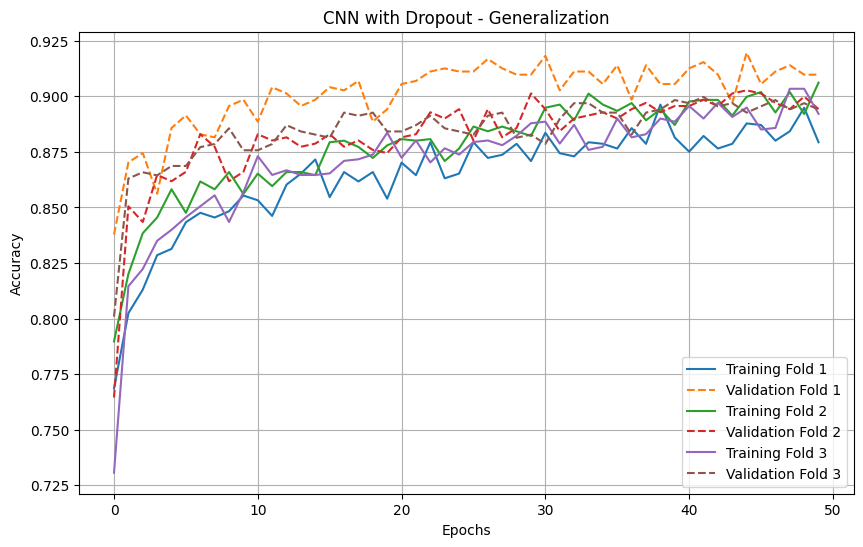

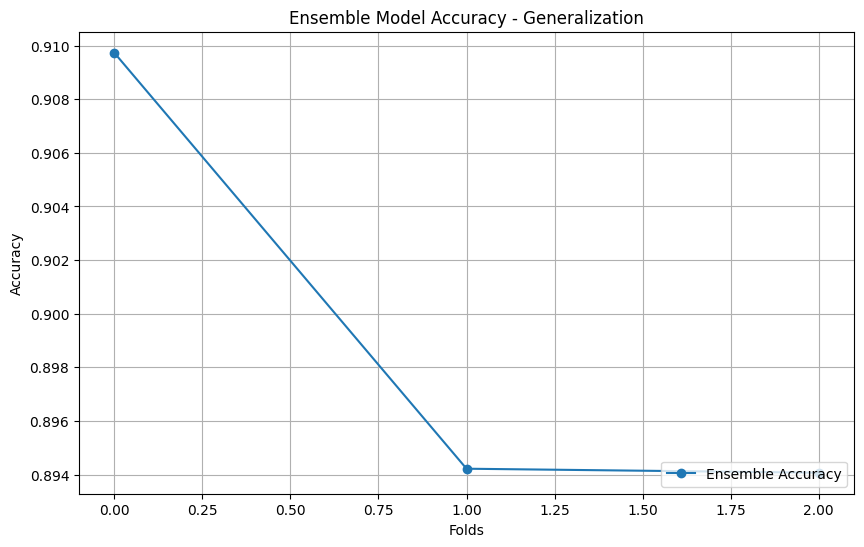

In [ ]:
#final code for writeup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

# Load and prepare the dataset (1D data)
file_path = 'fetal_health.csv'  # Update this path accordingly
data = pd.read_csv(file_path)

# Assuming the target column 'fetal_health' contains 3 categories: 1 (Normal), 2 (Moderate), 3 (Pathological)
# Map the categories to 0, 1, 2
data['fetal_health'] = data['fetal_health'] - 1

X = data.drop(columns=['fetal_health'])  # Features
y = data['fetal_health']  # Target: Normal, Moderate, Pathological

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape features for CNN input (1D data, so we add a single channel)
X_scaled = np.expand_dims(X_scaled, axis=-1)

# One-hot encode the labels (Normal=0, Moderate=1, Pathological=2)
y_onehot = to_categorical(y, num_classes=3)

# Define CNN model with Dropout for 1D data
def create_cnn_dropout(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.5),  # Dropout layer added
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.5),  # Dropout layer added
        Flatten(),
        Dense(128, activation='relu'),
        Dense(3, activation='softmax')  # 3 categories (Normal, Moderate, Pathological)
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train the CNN with Dropout model and return history
def train_model(model_func, X_train, y_train, X_val, y_val):
    model = model_func(input_shape=(X_train.shape[1], X_train.shape[2]))

    history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_data=(X_val, y_val), verbose=0)

    return model, history

# Perform 3-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
train_accuracies_dropout = []
val_accuracies_dropout = []
ensemble_accuracies = []

for train_idx, val_idx in kf.split(X_scaled):
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y_onehot[train_idx], y_onehot[val_idx]

    # Train CNN with dropout
    cnn_dropout, history_dropout = train_model(create_cnn_dropout, X_train_fold, y_train_fold, X_val_fold, y_val_fold)

    # Append accuracies to lists for plotting later
    train_accuracies_dropout.append(history_dropout.history['accuracy'])
    val_accuracies_dropout.append(history_dropout.history['val_accuracy'])

    # Predict on validation fold
    val_preds_dropout = cnn_dropout.predict(X_val_fold)

    # Convert predictions to class labels for accuracy calculation
    val_preds_classes = np.argmax(val_preds_dropout, axis=1)
    y_val_classes = np.argmax(y_val_fold, axis=1)

    # Calculate ensemble accuracy for this fold
    final_ensemble_acc = accuracy_score(y_val_classes, val_preds_classes)
    ensemble_accuracies.append(final_ensemble_acc)

# Evaluate the ensemble model
print(f'Final Ensemble Model Accuracy: {np.mean(ensemble_accuracies):.4f}')

# Plot generalization curves (train vs validation accuracy) for CNN with Dropout

# Function to plot generalization curve
def plot_generalization_curve(train_accuracies, val_accuracies, title):
    plt.figure(figsize=(10, 6))
    for i in range(len(train_accuracies)):
        plt.plot(train_accuracies[i], label=f'Training Fold {i+1}')
        plt.plot(val_accuracies[i], '--', label=f'Validation Fold {i+1}')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Plot generalization curve for CNN with Dropout
plot_generalization_curve(train_accuracies_dropout, val_accuracies_dropout, 'CNN with Dropout - Generalization')

# Plot Ensemble Model's Accuracy
plt.figure(figsize=(10, 6))
plt.plot(ensemble_accuracies, label="Ensemble Accuracy", marker='o')
plt.title("Ensemble Model Accuracy - Generalization")
plt.xlabel("Folds")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


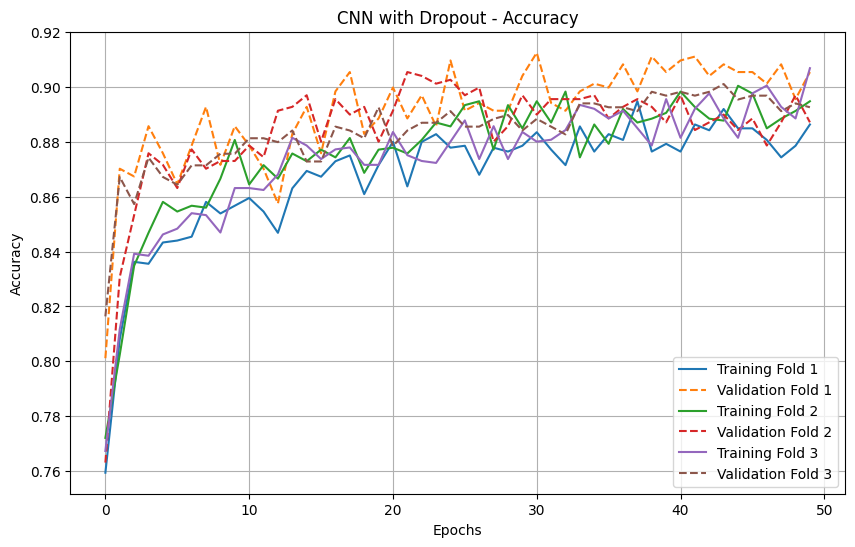

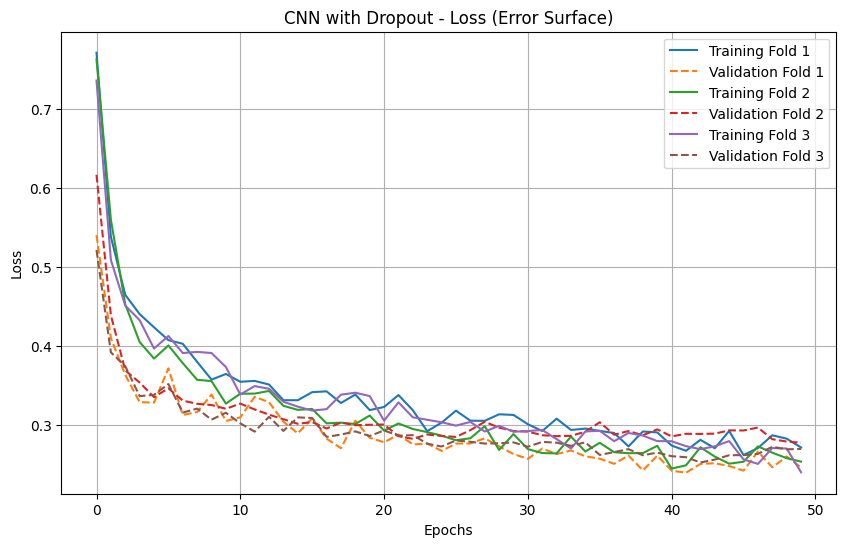

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

# Load and prepare the dataset (1D data)
file_path = 'fetal_health.csv'  # Update this path accordingly
data = pd.read_csv(file_path)

# Assuming the target column 'fetal_health' contains 3 categories: 1 (Normal), 2 (Moderate), 3 (Pathological)
# Map the categories to 0, 1, 2
data['fetal_health'] = data['fetal_health'] - 1

X = data.drop(columns=['fetal_health'])  # Features
y = data['fetal_health']  # Target: Normal, Moderate, Pathological

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape features for CNN input (1D data, so we add a single channel)
X_scaled = np.expand_dims(X_scaled, axis=-1)

# One-hot encode the labels (Normal=0, Moderate=1, Pathological=2)
y_onehot = to_categorical(y, num_classes=3)

# Define CNN model with Dropout for 1D data
def create_cnn_dropout(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.5),  # Dropout layer added
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.5),  # Dropout layer added
        Flatten(),
        Dense(128, activation='relu'),
        Dense(3, activation='softmax')  # 3 categories (Normal, Moderate, Pathological)
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train the CNN with Dropout model and return history
def train_model(model_func, X_train, y_train, X_val, y_val):
    model = model_func(input_shape=(X_train.shape[1], X_train.shape[2]))

    history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_data=(X_val, y_val), verbose=0)

    return model, history

# Perform 3-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
train_accuracies_dropout = []
val_accuracies_dropout = []
train_losses = []
val_losses = []

for train_idx, val_idx in kf.split(X_scaled):
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y_onehot[train_idx], y_onehot[val_idx]

    # Train CNN with dropout
    cnn_dropout, history_dropout = train_model(create_cnn_dropout, X_train_fold, y_train_fold, X_val_fold, y_val_fold)

    # Append accuracies and losses to lists for plotting later
    train_accuracies_dropout.append(history_dropout.history['accuracy'])
    val_accuracies_dropout.append(history_dropout.history['val_accuracy'])
    train_losses.append(history_dropout.history['loss'])
    val_losses.append(history_dropout.history['val_loss'])

# Plot accuracy curves (train vs validation)
def plot_accuracy_curve(train_accuracies, val_accuracies, title):
    plt.figure(figsize=(10, 6))
    for i in range(len(train_accuracies)):
        plt.plot(train_accuracies[i], label=f'Training Fold {i+1}')
        plt.plot(val_accuracies[i], '--', label=f'Validation Fold {i+1}')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Plot error surface (train vs validation loss)
def plot_loss_curve(train_losses, val_losses, title):
    plt.figure(figsize=(10, 6))
    for i in range(len(train_losses)):
        plt.plot(train_losses[i], label=f'Training Fold {i+1}')
        plt.plot(val_losses[i], '--', label=f'Validation Fold {i+1}')
    plt.title(f'{title} - Loss (Error Surface)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Plot accuracy curve for CNN with Dropout
plot_accuracy_curve(train_accuracies_dropout, val_accuracies_dropout, 'CNN with Dropout')

# Plot loss (error surface) curve for CNN with Dropout
plot_loss_curve(train_losses, val_losses, 'CNN with Dropout')


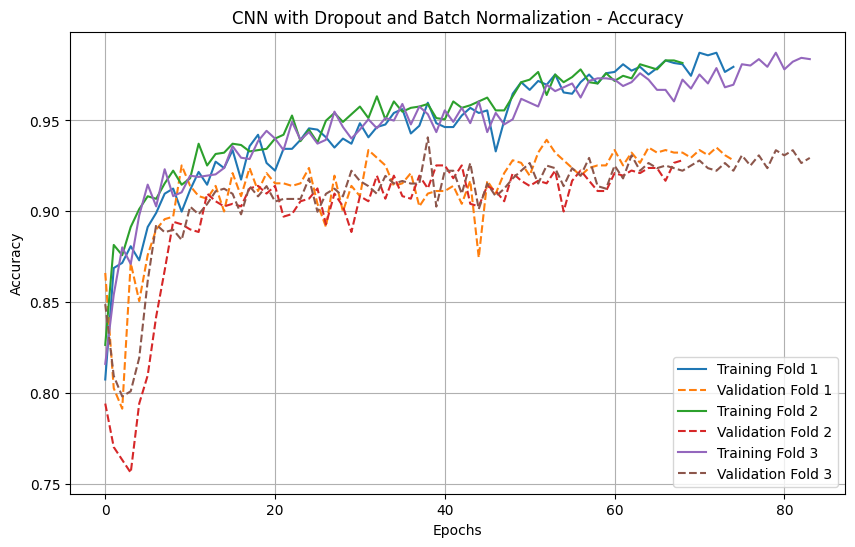

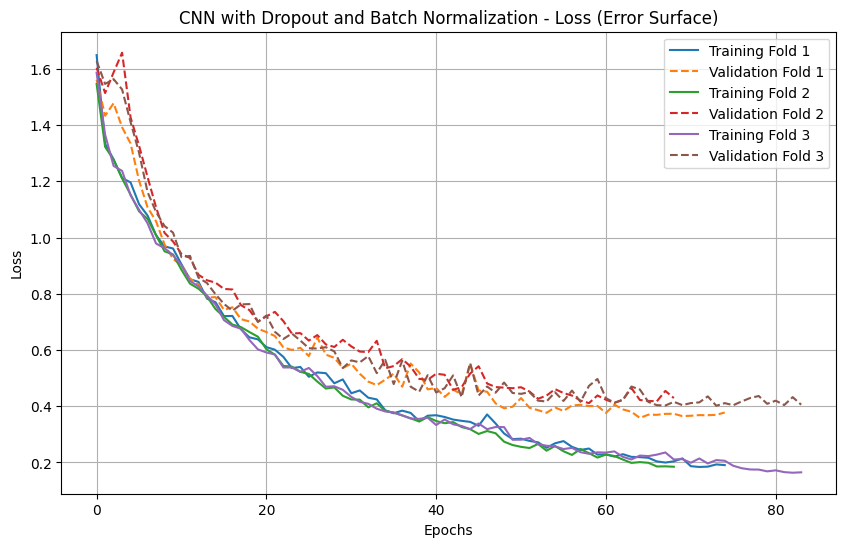

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from keras.regularizers import l2
# Load and prepare the dataset (1D data)
file_path = 'fetal_health.csv'  # Update this path accordingly
data = pd.read_csv(file_path)

# Assuming the target column 'fetal_health' contains 3 categories: 1 (Normal), 2 (Moderate), 3 (Pathological)
# Map the categories to 0, 1, 2
data['fetal_health'] = data['fetal_health'] - 1

X = data.drop(columns=['fetal_health'])  # Features
y = data['fetal_health']  # Target: Normal, Moderate, Pathological

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape features for CNN input (1D data, so we add a single channel)
X_scaled = np.expand_dims(X_scaled, axis=-1)

# One-hot encode the labels (Normal=0, Moderate=1, Pathological=2)
y_onehot = to_categorical(y, num_classes=3)



# Define CNN model with Dropout, Batch Normalization, and L2 Regularization for 1D data
def create_cnn_dropout(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),  # Batch Normalization layer added
        MaxPooling1D(pool_size=2),
        Dropout(0.3),  # Reduced dropout rate for first layer

        Conv1D(256, kernel_size=5, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),  # Batch Normalization layer added
        MaxPooling1D(pool_size=2),
        Dropout(0.3),  # Dropout layer added

        Flatten(),
        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.4),  # Dropout increased for dense layers
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        Dense(3, activation='softmax')  # 3 categories (Normal, Moderate, Pathological)
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Function to train the CNN with Dropout and Batch Normalization model and return history
def train_model(model_func, X_train, y_train, X_val, y_val):
    model = model_func(input_shape=(X_train.shape[1], X_train.shape[2]))

    # Early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Reduce learning rate if validation accuracy plateaus
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_val, y_val), verbose=0,
                        callbacks=[early_stopping, lr_scheduler])

    return model, history

# Perform 3-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
train_accuracies_dropout = []
val_accuracies_dropout = []
train_losses = []
val_losses = []

for train_idx, val_idx in kf.split(X_scaled):
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y_onehot[train_idx], y_onehot[val_idx]

    # Train CNN with dropout and batch normalization
    cnn_dropout, history_dropout = train_model(create_cnn_dropout, X_train_fold, y_train_fold, X_val_fold, y_val_fold)

    # Append accuracies and losses to lists for plotting later
    train_accuracies_dropout.append(history_dropout.history['accuracy'])
    val_accuracies_dropout.append(history_dropout.history['val_accuracy'])
    train_losses.append(history_dropout.history['loss'])
    val_losses.append(history_dropout.history['val_loss'])

# Plot accuracy curves (train vs validation)
def plot_accuracy_curve(train_accuracies, val_accuracies, title):
    plt.figure(figsize=(10, 6))
    for i in range(len(train_accuracies)):
        plt.plot(train_accuracies[i], label=f'Training Fold {i+1}')
        plt.plot(val_accuracies[i], '--', label=f'Validation Fold {i+1}')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Plot error surface (train vs validation loss)
def plot_loss_curve(train_losses, val_losses, title):
    plt.figure(figsize=(10, 6))
    for i in range(len(train_losses)):
        plt.plot(train_losses[i], label=f'Training Fold {i+1}')
        plt.plot(val_losses[i], '--', label=f'Validation Fold {i+1}')
    plt.title(f'{title} - Loss (Error Surface)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Plot accuracy curve for CNN with Dropout and Batch Normalization
plot_accuracy_curve(train_accuracies_dropout, val_accuracies_dropout, 'CNN with Dropout and Batch Normalization')

# Plot loss (error surface) curve for CNN with Dropout and Batch Normalization
plot_loss_curve(train_losses, val_losses, 'CNN with Dropout and Batch Normalization')


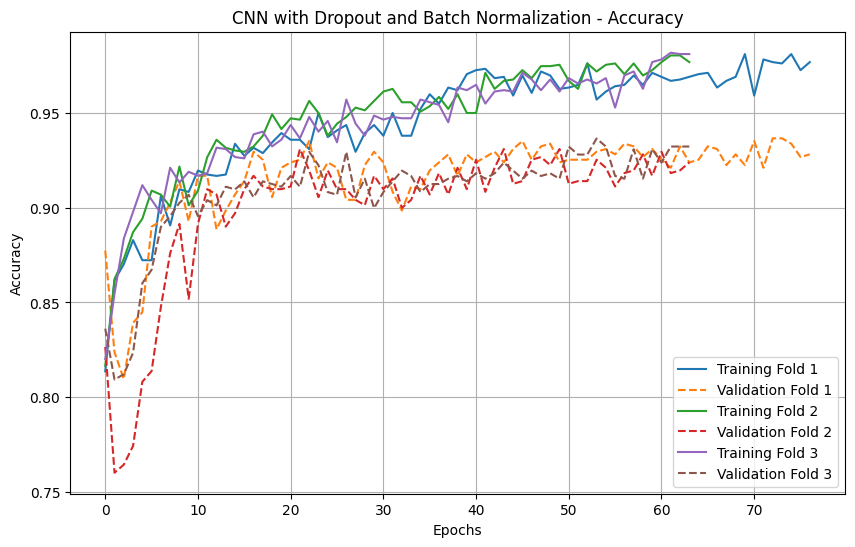

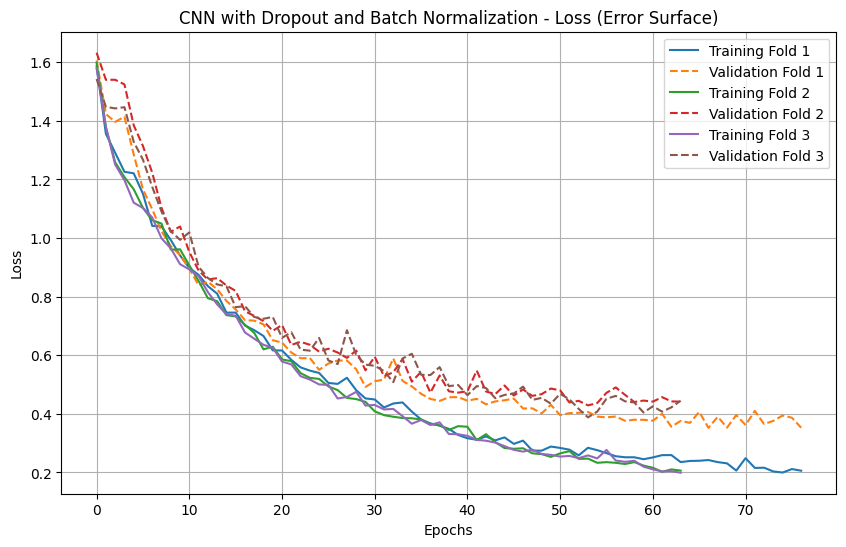

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from keras.regularizers import l2
# Load and prepare the dataset (1D data)
file_path = 'fetal_health.csv'  # Update this path accordingly
data = pd.read_csv(file_path)

# Assuming the target column 'fetal_health' contains 3 categories: 1 (Normal), 2 (Moderate), 3 (Pathological)
# Map the categories to 0, 1, 2
data['fetal_health'] = data['fetal_health'] - 1

X = data.drop(columns=['fetal_health'])  # Features
y = data['fetal_health']  # Target: Normal, Moderate, Pathological

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape features for CNN input (1D data, so we add a single channel)
X_scaled = np.expand_dims(X_scaled, axis=-1)

# One-hot encode the labels (Normal=0, Moderate=1, Pathological=2)
y_onehot = to_categorical(y, num_classes=3)



# Define CNN model with Dropout, Batch Normalization, and L2 Regularization for 1D data
def create_cnn_dropout(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),  # Batch Normalization layer added
        MaxPooling1D(pool_size=2),
        Dropout(0.3),  # Reduced dropout rate for first layer

        Conv1D(256, kernel_size=5, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),  # Batch Normalization layer added
        MaxPooling1D(pool_size=2),
        Dropout(0.3),  # Dropout layer added

        Flatten(),
        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.4),  # Dropout increased for dense layers
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        Dense(3, activation='softmax')  # 3 categories (Normal, Moderate, Pathological)
    ])
    model.compile(optimizer='adamW', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Function to train the CNN with Dropout and Batch Normalization model and return history
def train_model(model_func, X_train, y_train, X_val, y_val):
    model = model_func(input_shape=(X_train.shape[1], X_train.shape[2]))

    # Early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Reduce learning rate if validation accuracy plateaus
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_val, y_val), verbose=0,
                        callbacks=[early_stopping, lr_scheduler])

    return model, history

# Perform 3-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
train_accuracies_dropout = []
val_accuracies_dropout = []
train_losses = []
val_losses = []

for train_idx, val_idx in kf.split(X_scaled):
    X_train_fold, X_val_fold = X_scaled[train_idx], X_scaled[val_idx]
    y_train_fold, y_val_fold = y_onehot[train_idx], y_onehot[val_idx]

    # Train CNN with dropout and batch normalization
    cnn_dropout, history_dropout = train_model(create_cnn_dropout, X_train_fold, y_train_fold, X_val_fold, y_val_fold)

    # Append accuracies and losses to lists for plotting later
    train_accuracies_dropout.append(history_dropout.history['accuracy'])
    val_accuracies_dropout.append(history_dropout.history['val_accuracy'])
    train_losses.append(history_dropout.history['loss'])
    val_losses.append(history_dropout.history['val_loss'])

# Plot accuracy curves (train vs validation)
def plot_accuracy_curve(train_accuracies, val_accuracies, title):
    plt.figure(figsize=(10, 6))
    for i in range(len(train_accuracies)):
        plt.plot(train_accuracies[i], label=f'Training Fold {i+1}')
        plt.plot(val_accuracies[i], '--', label=f'Validation Fold {i+1}')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Plot error surface (train vs validation loss)
def plot_loss_curve(train_losses, val_losses, title):
    plt.figure(figsize=(10, 6))
    for i in range(len(train_losses)):
        plt.plot(train_losses[i], label=f'Training Fold {i+1}')
        plt.plot(val_losses[i], '--', label=f'Validation Fold {i+1}')
    plt.title(f'{title} - Loss (Error Surface)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Plot accuracy curve for CNN with Dropout and Batch Normalization
plot_accuracy_curve(train_accuracies_dropout, val_accuracies_dropout, 'CNN with Dropout and Batch Normalization')

# Plot loss (error surface) curve for CNN with Dropout and Batch Normalization
plot_loss_curve(train_losses, val_losses, 'CNN with Dropout and Batch Normalization')
